# Performing various feature selection methods on the cleaned data

In [1]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functions import *
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

In [2]:
# Reading the cleaned Toxicity data as a pandas DataFrame
chem_df = pd.read_csv("data_cleaned.csv")
display(chem_df.head())

,MATS3v,MATS3s,MATS3p,nHBDon_Lipinski,MATS3e,MATS3c,minHBint2,MATS3m,MATS3i,VR3_Dt,...,WTPT-2,WTPT-3,WTPT-4,WTPT-5,ETA_EtaP_L,ETA_EtaP_F,ETA_EtaP_B,nT5Ring,ETA_dEpsilon_C,Class
0,0.0908,0.0075,0.0173,0,-0.0436,0.0409,0.0,0.1368,-0.0574,31.8800,...,0.0000,0.0000,0.0000,0.0000,0.1780,1.5488,0.0088,0,-0.0868,NonToxic
1,0.0213,0.1144,-0.0410,0,0.1231,-0.0316,0.0,0.1318,-0.0715,28.2796,...,2.1204,28.2185,8.8660,19.3525,0.1739,1.3718,0.0048,2,-0.0810,NonToxic
2,0.0018,-0.0156,-0.0765,2,-0.1138,-0.1791,0.0,0.0615,-0.2185,66.8884,...,2.0850,33.1064,5.2267,27.8796,0.1688,1.4395,0.0116,2,-0.1004,NonToxic
3,-0.0251,-0.0064,-0.0894,3,-0.0747,-0.1151,0.0,0.0361,-0.2025,34.2573,...,2.0797,32.5232,7.7896,24.7336,0.1702,1.4654,0.0133,2,-0.1010,NonToxic
4,0.0135,0.0424,-0.0353,0,-0.0638,0.0307,0.0,0.0306,-0.0871,25.7867,...,2.1092,32.0726,12.3240,19.7486,0.1789,1.4495,0.0120,2,-0.1071,NonToxic


In [3]:
# Splitting the dataframe into features and class data, assuming 'Class' is the target variable
X = chem_df.drop(columns=['Class'])  
y = chem_df['Class']

### Performing logistic regression using f_classif as an example of a Filter Method

In [4]:
# Define the logistic regression model
model = LogisticRegression(solver='liblinear', random_state=42)
# Define the cross-validation strategy
cv = StratifiedKFold(n_splits=10)
# Call the feature_selection_filter()
results_filter = feature_selection_filter(X, y, model, cv, score_func=f_classif)

Number of Features: 2, CV Mean Accuracy: 0.6327 ± 0.0750
Number of Features: 3, CV Mean Accuracy: 0.6376 ± 0.0813
Number of Features: 4, CV Mean Accuracy: 0.6722 ± 0.0998
Number of Features: 5, CV Mean Accuracy: 0.6490 ± 0.0950
Number of Features: 6, CV Mean Accuracy: 0.6546 ± 0.0975
Number of Features: 7, CV Mean Accuracy: 0.6546 ± 0.0975
Number of Features: 8, CV Mean Accuracy: 0.6542 ± 0.1015
Number of Features: 9, CV Mean Accuracy: 0.6601 ± 0.1060
Number of Features: 10, CV Mean Accuracy: 0.6493 ± 0.1042
Number of Features: 11, CV Mean Accuracy: 0.6608 ± 0.1078
Number of Features: 12, CV Mean Accuracy: 0.6608 ± 0.0903
Number of Features: 13, CV Mean Accuracy: 0.6431 ± 0.1070
Number of Features: 14, CV Mean Accuracy: 0.6490 ± 0.0834
Number of Features: 15, CV Mean Accuracy: 0.6431 ± 0.0812
Number of Features: 16, CV Mean Accuracy: 0.6431 ± 0.0722
Number of Features: 17, CV Mean Accuracy: 0.6373 ± 0.0945
Number of Features: 18, CV Mean Accuracy: 0.6137 ± 0.1130
Number of Features: 19

### Performing Recursive Feature Elimination using a Descision Tree Classifier

In [ ]:
# Initialize the Decision Tree Classifier
dtc = DecisionTreeClassifier(random_state=42)
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'max_depth': list(range(1, 11)) + [None],
    'min_samples_split': list(range(2, 5)),
    'max_features': list(range(10, 20))
}
results_dtc, best_model = recursive_feature_elimination(X, y, dtc, skf, param_grid)

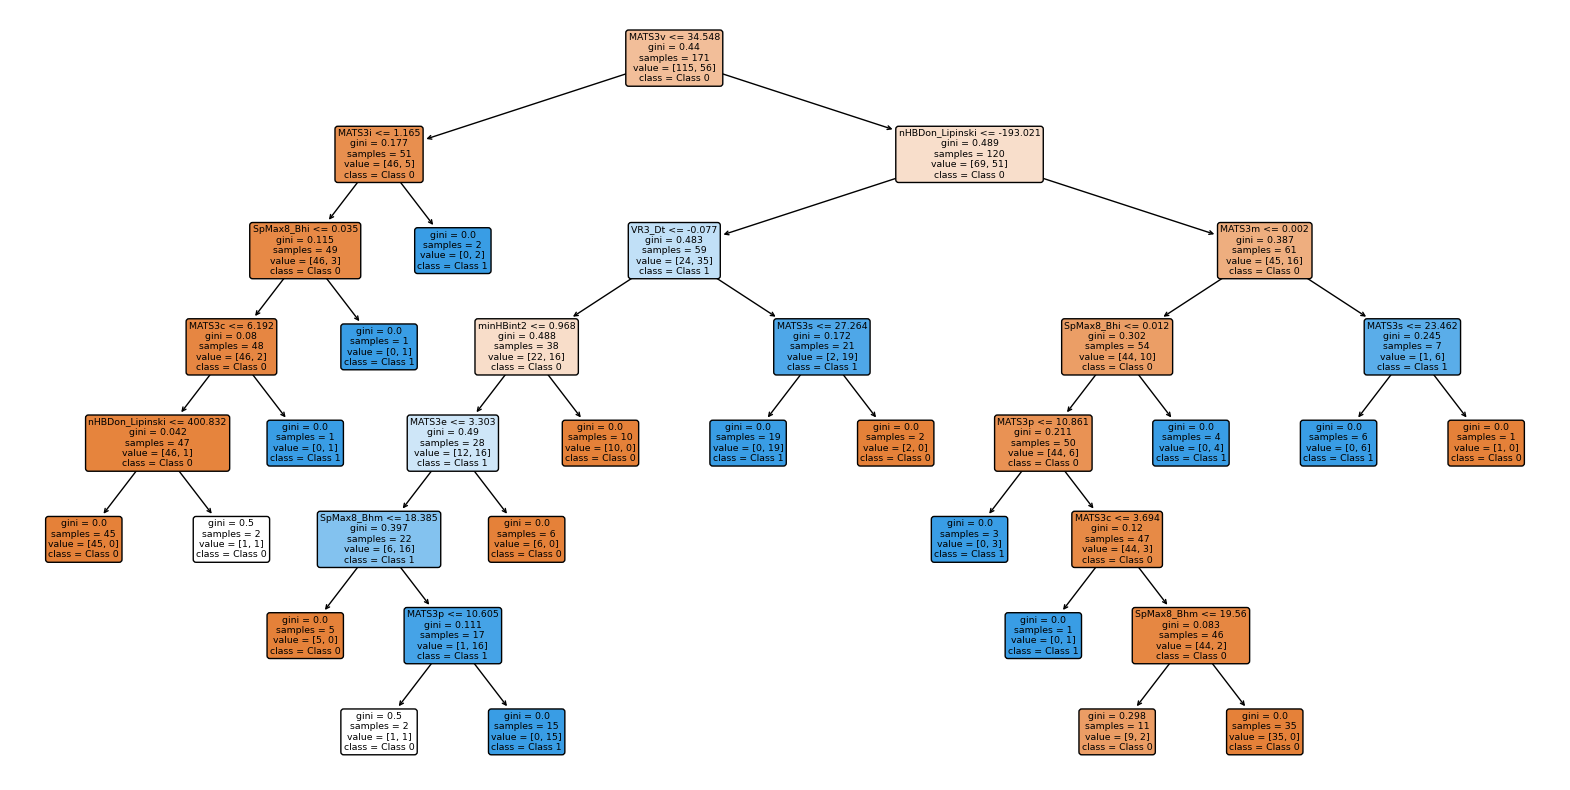

In [9]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Check if the best model is a decision tree
if isinstance(best_model, DecisionTreeClassifier):
    # Plot the decision tree
    plt.figure(figsize=(20,10))
    plot_tree(best_model, filled=True, feature_names=X.columns, class_names=['Class 0', 'Class 1'], rounded=True)
    plt.show()
else:
    print("The best model is not a DecisionTreeClassifier, it's:", type(best_model))

### Performing Recursive Feature Elimination using a Random Forest Classifier

In [ ]:
# Initialize the Randon Forest Classifier
rfc = RandomForestClassifier(random_state = 42)
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'max_depth': list(range(1, 11)) + [None],
    'min_samples_split': list(range(2, 5)),
    'max_features': list(range(10, 20))
}
results_rfc = recursive_feature_elimination(X, y, rfc, skf, param_grid)

### Performing Recursive Feature Elimination using a Logistic Regression Classifier

In [ ]:
# Standardize the features before applying Logistic Regression
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X))  # Standardizing the dataset
# Logistic Regression with L2 regularization
log = LogisticRegression(solver='liblinear', random_state=42)  # 'liblinear' is good for small datasets
# Initialize the cross-validation method
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# Define hyperparameter grid 
param_grid = {
    'C': [0.01, 0.1, 1, 10]
}
results_log = recursive_feature_elimination(X_scaled, y, log, skf, param_grid)

### Plotting the results of the different feature selecion methods 

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Mean accuracy")

# Plot Filter Method Results
plt.errorbar(
    x=results_filter["n_features"],
    y=results_filter["cv_mean_accuracy"],
    yerr=results_filter["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='lightblue',  # Lighter color for the error bars
    elinewidth=1,  # Width of the error bars
    capsize=4,  # Add caps at the ends of the error bars
    label='Filter Method'  # Label for legend
)

# Plot Logistic Regression results
plt.errorbar(
    x=results_log["n_features"],
    y=results_log["cv_mean_accuracy"],
    yerr=results_log["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='orange',
    elinewidth=1,
    capsize=4,
    label='Logistic'
)

# Plot Random Forest results
plt.errorbar(
    x=results_rfc["n_features"],
    y=results_rfc["cv_mean_accuracy"],
    yerr=results_rfc["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='lightgreen',
    elinewidth=1,
    capsize=4,
    label='Random Forest'
)

# Plot Descision Tree results
plt.errorbar(
    x=results_dtc["n_features"],
    y=results_dtc["cv_mean_accuracy"],
    yerr=results_dtc["cv_std_accuracy"],
    fmt='-o',  # Line with markers
    ecolor='lightcoral',
    elinewidth=1,
    capsize=4,
    label='Decicion Tree'
)

# Set x-ticks to range from 1 to 20
plt.xticks(ticks=range(1, 21))

# Add grid
plt.grid(linewidth=0.3)

# Add title
plt.title("Recursive Feature Selection")

# Add legend
plt.legend()

# Show plot
plt.show()